In [2]:
%load_ext autoreload
%autoreload 2

from utils.yfcos_utils import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ds_metadata, ds_dicts = register_datasets()


Metadata Catalog from custom dataset:
Metadata(evaluator_type='coco', image_root='/mnt/zerowastepublic/02-datasets/ds2/images', json_file='/mnt/zerowastepublic/02-datasets/ds2/dataset_config/ds2_3c_test_coco_instances.json', name='custom_dataset_test', thing_classes=['utensils', 'coffeeCup', 'clearCup'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2})


In [4]:
#mymodel = 'yfcos_ds2_r101_x02'
mymodel = 'yfcos_ds2_r50_x08'
yfmnt = f'/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/{mymodel}/'
MODLE_PATH = os.path.join(yfmnt, 'model_final.pth')
MODLE_CFG_PATH = os.path.join(yfmnt, 'config.yaml')
METRICS_FILE = os.path.join(yfmnt, 'metrics.json')


cfg, predictor = setup_model(mymodel, MODLE_PATH)

Config 'configs/Yolact/yfcos_ds2_r50_x08.yaml' has no VERSION. Assuming it to be compatible with latest v2.


MODEL WEIGHTS: /mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/yfcos_ds2_r50_x08/model_final.pth

MODEL HEADS

BATCH_SIZE_PER_IMAGE: 512
IN_FEATURES: ['res4']
IOU_LABELS: [0, 1]
IOU_THRESHOLDS: [0.5]
NAME: Res5ROIHeads
NMS_THRESH_TEST: 0.5
NUM_CLASSES: 80
POSITIVE_FRACTION: 0.25
PROPOSAL_APPEND_GT: True
SCORE_THRESH_TEST: 0.05


MODEL DATASETS

PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
PROPOSAL_FILES_TEST: ()
PROPOSAL_FILES_TRAIN: ()
TEST: ('custom_dataset_val',)
TRAIN: ('custom_dataset_train',)


In [ ]:
#predictor.model.head
#predictor.model.backbone

In [ ]:
from detectron2.modeling import build_model
model = build_model(cfg)

#from detectron2.modeling import GeneralizedRCNNWithTTA
#model = GeneralizedRCNNWithTTA(cfg, model)

In [16]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("custom_dataset_val", cfg, False, output_dir="/home/redne/notebooks/output/")
val_loader = build_detection_test_loader(cfg, "custom_dataset_val")
inference_on_dataset(model, val_loader, evaluator)

No predictions from the model! Set scores to -1
No predictions from the model! Set scores to -1


OrderedDict([('bbox',
              {'AP': -1,
               'AP50': -1,
               'AP75': -1,
               'APs': -1,
               'APm': -1,
               'APl': -1}),
             ('segm',
              {'AP': -1,
               'AP50': -1,
               'AP75': -1,
               'APs': -1,
               'APm': -1,
               'APl': -1})])

In [ ]:
#!zip -q -r output.zip output
#shutil.copyfile('output.zip', '/content/drive/My Drive/result/output.zip')

In [8]:
import numpy as np

In [10]:
cfg.SOLVER.MAX_ITER

20000

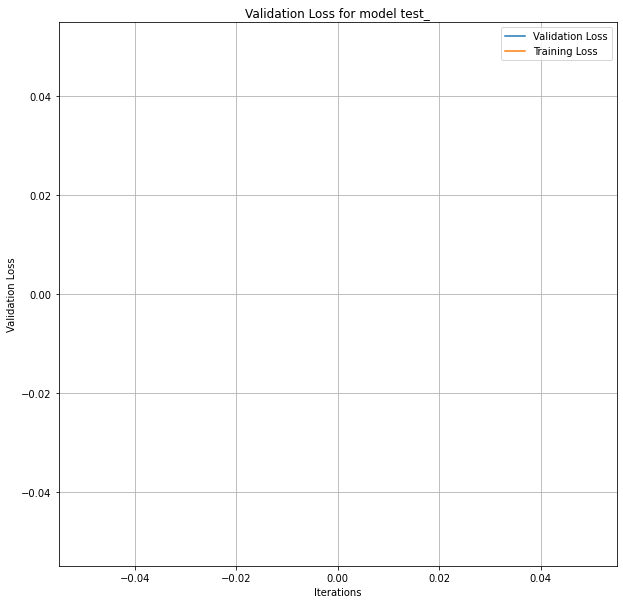

In [12]:
# https://github.com/JoanFM/M5_VisualRecognition/blob/master/Week6/TaskB/src/experiment_1.py
#def plot_validation_loss(cfg, iterations, model_name, savepath, filename):
model_name = "test_"
filename = 'validation_loss.png'
savepath  ="/home/redne/notebooks/"
iterations = cfg.SOLVER.MAX_ITER
val_loss = []
train_loss = []
for line in open(METRICS_FILE, 'r'):
    result = json.loads(line)
    if 'total_val_loss' in result.keys() and 'total_loss' in result.keys():
        val_loss.append(result['total_val_loss'])
        train_loss.append(result['total_loss'])
val_idx = [int(item) for item in list(np.linspace(0, iterations, len(val_loss)))]
train_idx = [int(item) for item in list(np.linspace(0, iterations, len(train_loss)))]

plt.figure(figsize=(10, 10))
plt.plot(val_idx,val_loss, label='Validation Loss')
plt.plot(train_idx,train_loss, label='Training Loss')
plt.title('Validation Loss for model ' + '{0}'.format(model_name))
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.grid('True')
plt.legend()
plt.savefig(os.path.join(savepath, filename))

In [17]:
result

{'data_time': 0.0065533440065337345,
 'eta_seconds': 75.15423759885016,
 'iteration': 19979,
 'loss_fcos_cls': 0.001449436298571527,
 'loss_fcos_ctr': 0.5844207108020782,
 'loss_fcos_loc': 0.02412377018481493,
 'loss_mask': 0.008787753991782665,
 'lr': 2.5000000000000005e-08,
 'time': 3.5934926730042207,
 'total_loss': 0.6194688804098405}